In [1]:
import pandas as pd
df = pd.read_json (r'C:\Users\gouth\OneDrive\Desktop\Dalhousie\Thesis\WESI\Data\drill_report_data_confidential.json')
df.to_csv (r'C:\Users\gouth\OneDrive\Desktop\Dalhousie\Thesis\WESI\Data\data_excel_confidential.csv', index = None)

df1 = (df.groupby('file_no')['text']
       .apply(lambda x: ','.join(x.dropna().unique()))
       .reset_index())

texty = df1['text'].values.tolist()
file_number = df1['file_no'].values.tolist()

after_ocr = df.values.tolist()
raw = df1.values.tolist()

In [1]:
df_all = pd.read_csv(r'C:\Users\gouth\OneDrive\Desktop\Dalhousie\Thesis\WESI\Untitled Folder\Entire data\New_data\FINAL_LIST.csv')

data_ = df_all.values.tolist()
texty_ = [i[1] for i in data_]

NameError: name 'pd' is not defined

In [28]:
import gensim
from gensim.corpora import Dictionary
tokenized_text = []
for j in data_:
    tokenized_text.append(j[1].split())

In [33]:
bigram = gensim.models.Phrases(tokenized_text, min_count = 30) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[tokenized_text])

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

#print(trigram_mod[bigram_mod[tokenized_text[0]]])


bi_tri_grams = []
with_grams = [trigram_mod[bigram_mod[doc]] for doc in tokenized_text]

for doc in with_grams:
     #for token in trigram[bigram[tokenized_text[idx]]]:
    for token in doc:
        
        if '_' in token:
    #             tokenized_text[idx].append(token)
            bi_tri_grams.append(token)
            
# len(bi_tri_grams)

In [43]:
len(with_grams[0])

269

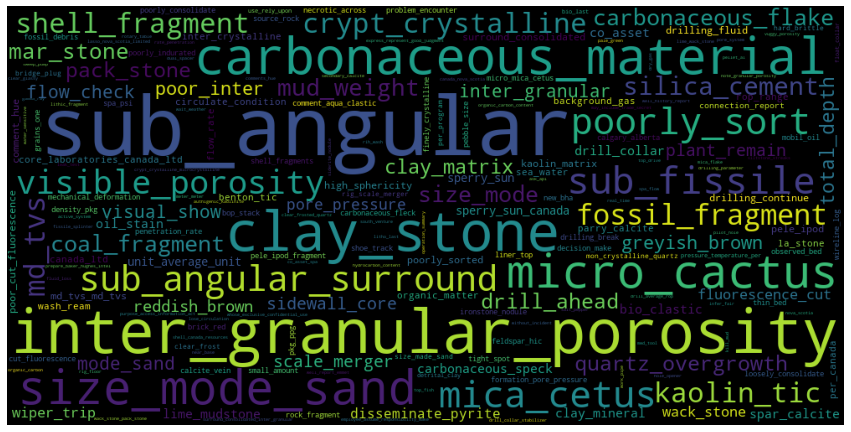

In [35]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

word_could_dict=Counter(bi_tri_grams)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

In [36]:
dict(sorted(word_could_dict.items(), key=lambda item: item[1], reverse = True)[:20])

{'sub_angular': 19387,
 'inter_granular_porosity': 15309,
 'clay_stone': 13361,
 'carbonaceous_material': 11251,
 'size_mode_sand': 10138,
 'micro_cactus': 9967,
 'sub_fissile': 6270,
 'mica_cetus': 5875,
 'poorly_sort': 5786,
 'sub_angular_surround': 5216,
 'visible_porosity': 5193,
 'fossil_fragment': 3951,
 'md_tvs': 3849,
 'shell_fragment': 3650,
 'crypt_crystalline': 3649,
 'kaolin_tic': 3593,
 'silica_cement': 2981,
 'mud_weight': 2671,
 'size_mode': 2564,
 'coal_fragment': 2533}

In [46]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

ngram_docs = []
for tokens in with_grams:
    ngram_docs.append(TreebankWordDetokenizer().detokenize(tokens))
        
        
df_spell_s = pd.DataFrame(ngram_docs)
df_spell_s.to_csv (r'C:\Users\gouth\OneDrive\Desktop\Dalhousie\Thesis\WESI\Untitled Folder\Entire data\New_data\Ngrams_docs.csv', index = None)

In [48]:
ngram_docs[0]

'write fluids discussion classification drilling_fluid_cost hole section length drilling_fluid section well drill problem however area cause delay operation follow total day case size set depth mart hole section case casing could back due end annulus require_washing reentry hanger ridge plug lemon dst bridge_plug cement bridge_plug cement float_collar case shoe water depth diving_operation diving_support well provide_rov launch drilling unit main_deck primary use conduct routine check scour around spud complete list_dive include appendix description core recovery core summary cut ane encounter well kick cement squeeze annulus isolate annulus case cementing report cold blog new cement cemented ives per_canada al co_asset_co_asset depth day spud drill hole run case drill hole run case nipple_bop drill hole build_angle total well exploration per canada_resources floor_bank montreal_building george_street_halifax rowan_gorilla_jackup marathon let_bureau super_gorilla class operator_rowan_c